<a href="https://colab.research.google.com/github/Crislaine-Lucena/Tratando-Filmes-Netflix-CSV.ipynb/blob/main/Tratando_Filmes_Netflix_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Netflix.csv')

In [ ]:
df.head()

df.info()

df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   cast          180 non-null    object
 5   country       136 non-null    object
 6   date_added    200 non-null    object
 7   release_year  200 non-null    int64 
 8   rating        200 non-null    object
 9   duration      200 non-null    object
 10  listed_in     200 non-null    object
 11  description   200 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.9+ KB


,0
show_id,0
type,0
title,0
director,63
cast,20
country,64
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
# há valores faltantes em cast, country e director.
#date_added está com tipo errado
#durations mistura minutos para filmes e temporadas para series


In [ ]:
# Aqui eu vou padronizar os dados NAN para algo que nao traga problemas futuros.

df['director'].fillna('Desconhecido',inplace=True)
df['cast'].fillna('Não informado', inplace = True)
df['country'].fillna('Não especificado', inplace= True)

print(df.isnull().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


/tmp/ipython-input-1795949949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Desconhecido',inplace=True)
/tmp/ipython-input-1795949949.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
print(df.dtypes)


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# padronizar date_added
df['date_added'] = pd.to_datetime(df['date_added'], format='%d-%b-%y')
print(df['date_added'].head())



0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


In [ ]:
#yratar a coluna duration - aqui vou criar outras duas colunas 'duration_minutes' para filmes e seadons para series

df['duration'].head(30)



,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons
5,1 Season
6,91 min
7,125 min
8,9 Seasons
9,104 min


In [ ]:
#extrair minutos (filmes)

df['duration_minutes'] = df['duration'].apply(
    lambda x: int(x.split()[0]) if 'min' in str(x) else None)

#series

df['seasons'] = df['duration'].apply(
    lambda x : int(x.split()[0]) if 'Season' in str(x) else None
)

df.drop('duration', axis=1, inplace=True)



In [ ]:
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não especificado,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Desconhecido,Não informado,Não especificado,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Não especificado,2021-09-24,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,NaN,1.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Não especificado,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,NaN
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,NaN,9.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,NaN


In [ ]:
#tirando o NaN e deixando como 0
df['duration_minutes'] = df['duration_minutes'].fillna(0)
df['seasons'] = df['seasons'].fillna(0)
df['show_id']= df['show_id'].str.replace('s',' ')
df['show_id'] = df['show_id'].astype(int)


In [ ]:
df.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
listed_in,object


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não especificado,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,4,TV Show,Jailbirds New Orleans,Desconhecido,Não informado,Não especificado,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,2021-08-27,2008,TV-14,"Comedies, Dramas, International Movies",A bank hires an enigmatic and unorthodox debt ...,128.0,0.0
196,197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",Não especificado,2021-08-27,2021,TV-14,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...,92.0,0.0
197,198,TV Show,I Heart Arlo,Desconhecido,"Michael J. Woodard, Mary Lambert, Jonathan Van...",Não especificado,2021-08-27,2021,TV-Y7,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...,0.0,1.0
198,199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021-08-27,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           200 non-null    int64         
 1   type              200 non-null    object        
 2   title             200 non-null    object        
 3   director          200 non-null    object        
 4   cast              200 non-null    object        
 5   country           200 non-null    object        
 6   date_added        200 non-null    datetime64[ns]
 7   release_year      200 non-null    int64         
 8   rating            200 non-null    object        
 9   listed_in         200 non-null    object        
 10  description       200 non-null    object        
 11  duration_minutes  200 non-null    float64       
 12  seasons           200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 20.4+ KB


In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_minutes,seasons
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Não informado,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,0.0
1,2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0.0,2.0
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Não especificado,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0.0,1.0
3,4,TV Show,Jailbirds New Orleans,Desconhecido,Não informado,Não especificado,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0.0,1.0
4,5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0.0,2.0


from matplotlib import pyplot as plt
_df_0['show_id'].plot(kind='hist', bins=20, title='show_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['duration_minutes'].plot(kind='hist', bins=20, title='duration_minutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['seasons'].plot(kind='hist', bins=20, title='seasons')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('cast').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='show_id', y='release_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='release_year', y='duration_minutes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='duration_minutes', y='seasons', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['duration_minutes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('duration_minutes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['duration_minutes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('duration_minutes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['duration_minutes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('director')):
  _plot_series(series, series_name, i)
  fig.legend(title='director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('duration_minutes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['duration_minutes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cast')):
  _plot_series(series, series_name, i)
  fig.legend(title='cast', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('duration_minutes')

from matplotlib import pyplot as plt
_df_15['show_id'].plot(kind='line', figsize=(8, 4), title='show_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['duration_minutes'].plot(kind='line', figsize=(8, 4), title='duration_minutes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['seasons'].plot(kind='line', figsize=(8, 4), title='seasons')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_19.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['director'].value_counts()
    for x_label, grp in _df_20.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('director')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cast'].value_counts()
    for x_label, grp in _df_21.groupby('director')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('director')
_ = plt.ylabel('cast')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in _df_22.groupby('cast')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cast')
_ = plt.ylabel('country')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='show_id', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='show_id', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='show_id', y='director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['cast'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='show_id', y='cast', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Quando eu for calcular as seasons e minutes eu vou precisar levar em consideração que há muitos zeros ent na hora de entrar no calculo eu preciso desconsiderar os zeros e considerar o que tiver, no caso se for series devo considerar a quantidade de temporadas e filmes a quantidade de minutos. No momento eu nao vejo como vou precisar fazer um calculo que permeie os dois porem se for necessário eu ja sei o que fazer.

In [ ]:
contagem = df['type'].value_counts()
porcentagem = df['type'].value_counts(normalize=True) * 100

print(contagem)
print(porcentagem)


type
Movie      127
TV Show     73
Name: count, dtype: int64
type
Movie      63.5
TV Show    36.5
Name: proportion, dtype: float64


Aqui conseguimos verificar que há mais "Movie" que "tvshow"
Agora vamos apresentar:

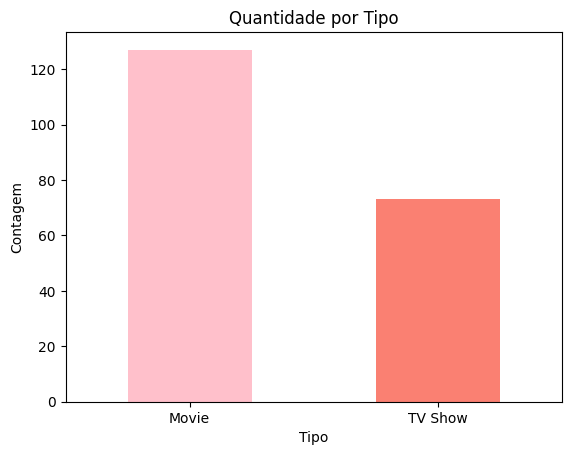

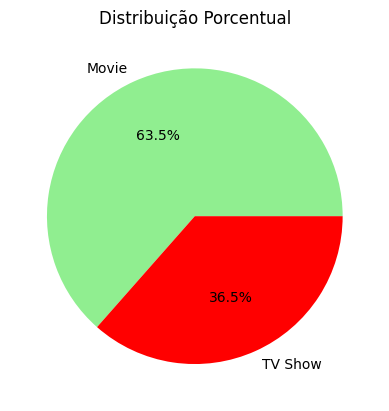

In [ ]:
contagem.plot(kind='bar', color=['pink', 'salmon'])
plt.title('Quantidade por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

porcentagem.plot(kind='pie', autopct='%.1f%%', colors=['lightgreen', 'red'])
plt.title('Distribuição Porcentual')
plt.ylabel('')
plt.show()

bciabcabkchb

In [ ]:
df_filtrado_diretores = df[~df['director'].str.contains('Desconhecido', case=False, na=False)]
contagem_diretores = df_filtrado_diretores['director'].value_counts()

contagem_diretores

,count
director,
Toshiya Shinohara,4
Masahiko Murata,3
Hajime Kamegaki,2
Antoine Fuqua,2
"Chapman Way, Maclain Way",2
...,...
Taylor Sheridan,1
Sachin Yardi,1
Saurabh Kabra,1


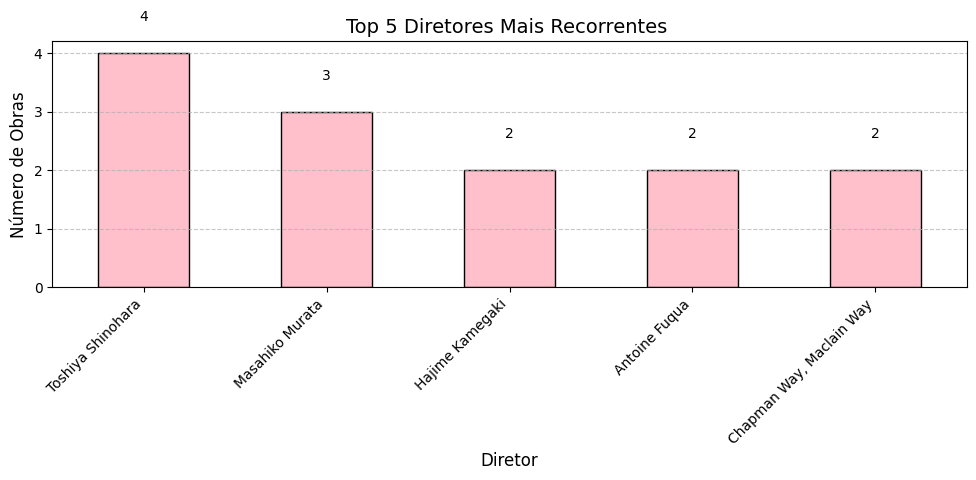

In [ ]:
top_5_diretores = df_filtrado_diretores['director'].value_counts().head(5)


plt.figure(figsize=(10, 5))
top_5_diretores.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 5 Diretores Mais Recorrentes ', fontsize=14)
plt.xlabel('Diretor', fontsize=12)
plt.ylabel('Número de Obras', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(top_5_diretores):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
df_filtrado_country= df[~df['country'].str.contains('Não especificado', case=False, na=False)]
contagem_country = df_filtrado_country['country'].value_counts()

contagem_country

,count
country,
United States,50
India,15
Japan,14
United Kingdom,5
Nigeria,4
"United Kingdom, United States",4
Australia,3
France,2
"United States, Canada",2


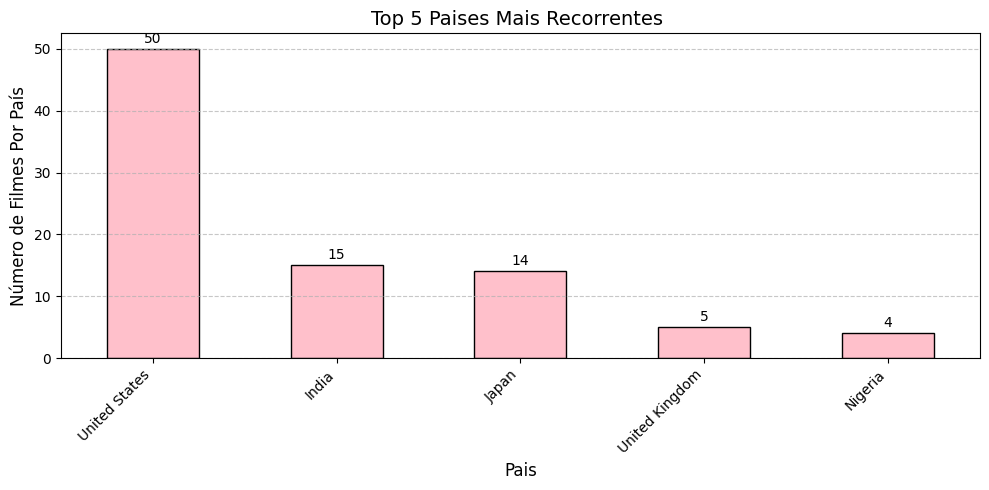

In [ ]:
top_5_paises = df_filtrado_country['country'].value_counts().head(5)

plt.figure(figsize=(10, 5))
top_5_paises.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 5 Paises Mais Recorrentes ', fontsize=14)
plt.xlabel('Pais', fontsize=12)
plt.ylabel('Número de Filmes Por País', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(top_5_paises):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

eu vou utilizar a coluna "listed_in", como cada filme pode ter mais de um genero, vou "quebrar" antes de contabilizar os tipos.

In [ ]:
#TESTANDO  e realmente, ocorreu o que eu previa. Vamos EXPLODIR esse lited_in então.
df['listed_in'].value_counts()

,count
listed_in,
"Action & Adventure, Anime Features, International Movies",12
Kids' TV,8
"Dramas, International Movies, Thrillers",6
"Kids' TV, TV Comedies",6
Children & Family Movies,6
...,...
"International TV Shows, TV Comedies",1
"Dramas, Independent Movies",1
"Action & Adventure, Comedies, International Movies",1


In [ ]:
df_explodido = df['listed_in'].str.split(', ').explode()
df_explodido.value_counts()


,count
listed_in,
Dramas,45
International Movies,42
Comedies,41
Action & Adventure,40
International TV Shows,31
Kids' TV,22
TV Comedies,20
Thrillers,17
TV Dramas,16


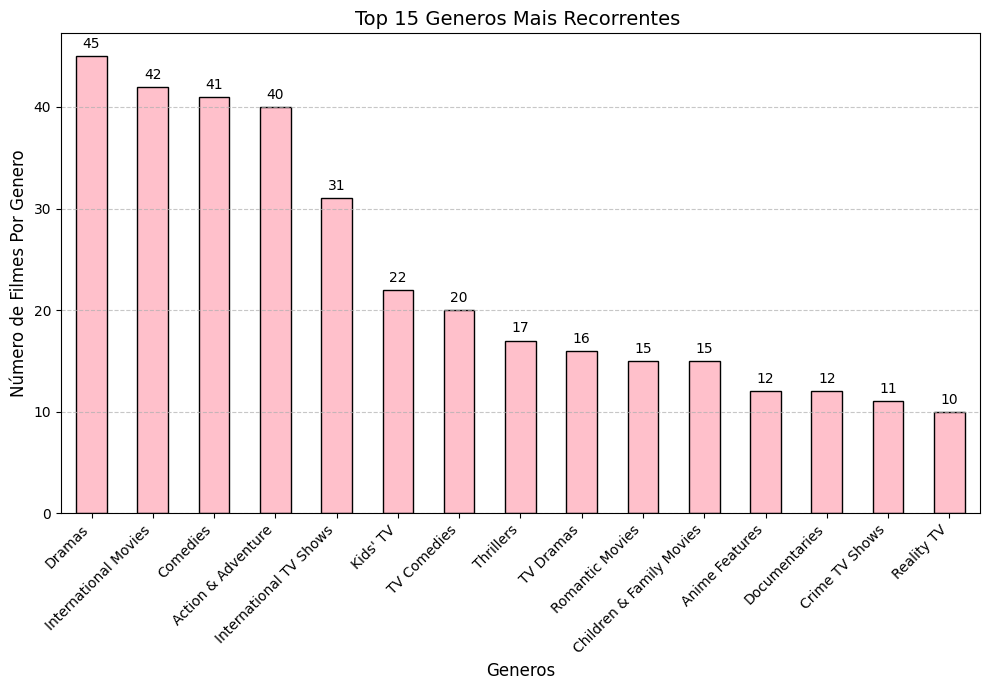

In [ ]:
top_15_generos = df_explodido.value_counts().head(15)

plt.figure(figsize=(10, 7))
top_15_generos.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 15 Generos Mais Recorrentes ', fontsize=14)
plt.xlabel('Generos', fontsize=12)
plt.ylabel('Número de Filmes Por Genero', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(top_15_generos):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Agora farei o mesmo com "cast", porem retirando o "Não informado".

In [ ]:
df_explodido_cast = df['cast'].str.split(', ').explode()
df_filtrado_cast = df_explodido_cast[~df_explodido_cast.str.contains('Não informado', case=False, na=False)]
df_filtrado_cast.value_counts()

,count
cast,
Chie Nakamura,8
Junko Takeuchi,8
Kazuhiko Inoue,6
Showtaro Morikubo,5
Houko Kuwashima,5
...,...
Sumriddhi Shukla,1
Jun Fukuyama,1
Yuma Uchida,1


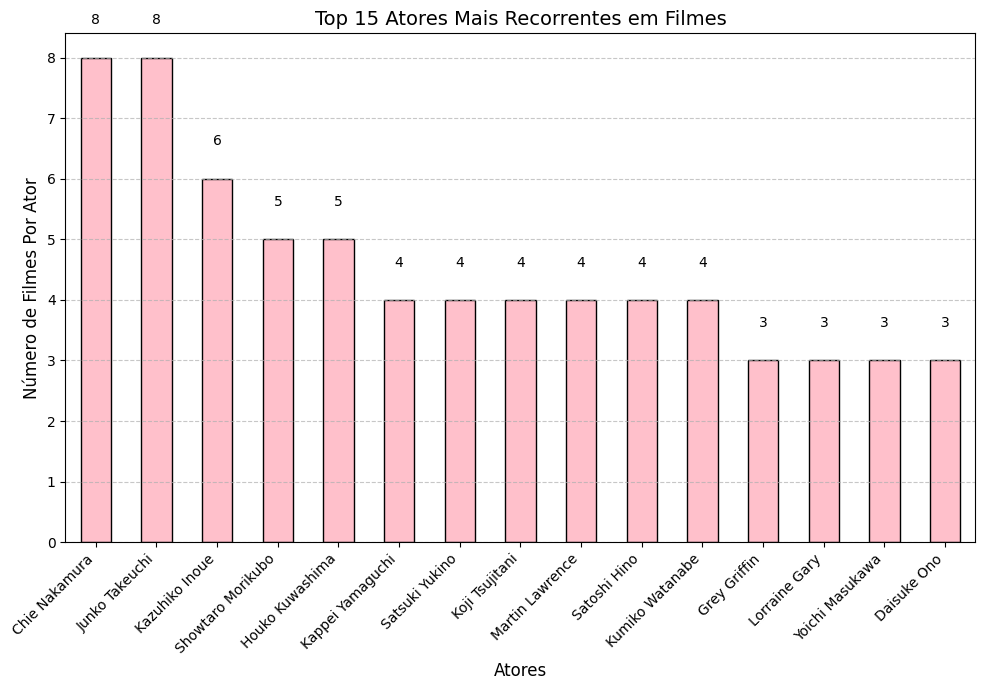

In [ ]:
top_15_Principais_Atores = df_filtrado_cast.value_counts().head(15)
plt.figure(figsize=(10, 7))
top_15_Principais_Atores.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 15 Atores Mais Recorrentes em Filmes', fontsize=14)
plt.xlabel('Atores', fontsize=12)
plt.ylabel('Número de Filmes Por Ator', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(top_15_Principais_Atores):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()